In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df_train = pd.read_csv('kaggle_bike_competition_train.csv',header = 0)

In [6]:
df_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [7]:
df_train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [11]:
df_train.shape

(10886, 12)

In [15]:
df_train.index

RangeIndex(start=0, stop=10886, step=1)

In [16]:
df_train.count()

datetime      10886
season        10886
holiday       10886
workingday    10886
weather       10886
temp          10886
atemp         10886
humidity      10886
windspeed     10886
casual        10886
registered    10886
count         10886
dtype: int64

In [17]:
df_train['month'] = pd.DatetimeIndex(df_train.datetime).month
df_train['day'] = pd.DatetimeIndex(df_train.datetime).dayofweek
df_train['hour'] = pd.DatetimeIndex(df_train.datetime).hour

In [18]:
df_train.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,5,4
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1,1,5,5
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2,1,5,6
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3,1,5,7
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8,1,5,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14,1,5,9


In [19]:
df_train_origin = df_train

In [20]:
df_train = df_train.drop(['datetime','casual','registered'], axis = 1)

In [21]:
df_train.head(5)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,1,5,0
1,1,0,0,1,9.02,13.635,80,0.0,40,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,1,5,2
3,1,0,0,1,9.84,14.395,75,0.0,13,1,5,3
4,1,0,0,1,9.84,14.395,75,0.0,1,1,5,4


In [22]:
df_train.shape

(10886, 12)

In [23]:
df_train_target = df_train['count'].values
df_train_data = df_train.drop(['count'],axis = 1).values

In [24]:
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.learning_curve import learning_curve
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import explained_variance_score

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [27]:
cv = cross_validation.ShuffleSplit(len(df_train_data),n_iter=3,test_size=0.2,random_state=0)

In [29]:
print ("岭回归")    
for train, test in cv:    
    svc = linear_model.Ridge().fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))
    
print ("支持向量回归/SVR(kernel='rbf',C=10,gamma=.001)")
for train, test in cv:
    
    svc = svm.SVR(kernel ='rbf', C = 10, gamma = .001).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))
    
print ("随机森林回归/Random Forest(n_estimators = 100)" )
for train, test in cv:    
    svc = RandomForestRegressor(n_estimators = 100).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))

岭回归
train score: 0.339, test score: 0.332

train score: 0.330, test score: 0.370

train score: 0.342, test score: 0.320

支持向量回归/SVR(kernel='rbf',C=10,gamma=.001)
train score: 0.417, test score: 0.408

train score: 0.406, test score: 0.452

train score: 0.419, test score: 0.390

随机森林回归/Random Forest(n_estimators = 100)
train score: 0.982, test score: 0.863

train score: 0.981, test score: 0.880

train score: 0.982, test score: 0.870



In [45]:
X = df_train_data
y = df_train_target

X_train, X_test, y_train, y_test = cross_validation.train_test_split(
    X, y, test_size=0.2, random_state=0)

tuned_parameters = [{'n_estimators':[10,100,200,300,500,1000]}]   
    
scores = ['r2']

for score in scores:
    
    print(score)
    
    clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5, scoring=score)
    clf.fit(X_train, y_train)

    print("别！喝！咖！啡！了！最佳参数找到了亲！！：")
    #best_estimator_ returns the best estimator chosen by the search
    print(clf.best_estimator_)
    print("得分分别是:")
    #grid_scores_的返回值:
    #    * a dict of parameter settings
    #    * the mean score over the cross-validation folds 
    #    * the list of scores for each fold
    for params, mean_score, scores in clf.grid_scores_:
        print("%0.3f (+/-%0.03f) for %r"%(mean_score, scores.std() / 2, params))

r2
别！喝！咖！啡！了！最佳参数找到了亲！！：
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
得分分别是:
0.849 (+/-0.008) for {'n_estimators': 10}
0.862 (+/-0.006) for {'n_estimators': 100}
0.863 (+/-0.006) for {'n_estimators': 200}
0.863 (+/-0.005) for {'n_estimators': 300}
0.864 (+/-0.005) for {'n_estimators': 500}
0.864 (+/-0.005) for {'n_estimators': 1000}


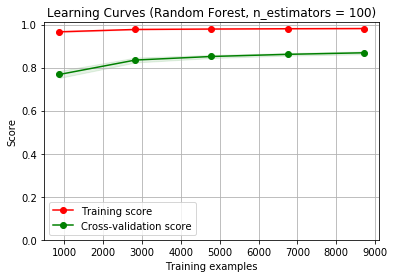

In [32]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curves (Random Forest, n_estimators = 100)"
cv = cross_validation.ShuffleSplit(df_train_data.shape[0], n_iter=10,test_size=0.2, random_state=0)
estimator = RandomForestRegressor(n_estimators = 100)
plot_learning_curve(estimator, title, X, y, (0.0, 1.01), cv=cv, n_jobs=4)

plt.show()

In [33]:
print ("随机森林回归/Random Forest(n_estimators=200, max_features=0.6, max_depth=15)")
for train, test in cv: 
    svc = RandomForestRegressor(n_estimators = 200, max_features=0.6, max_depth=15).fit(df_train_data[train], df_train_target[train])
    print("train score: {0:.3f}, test score: {1:.3f}\n".format(
        svc.score(df_train_data[train], df_train_target[train]), svc.score(df_train_data[test], df_train_target[test])))

随机森林回归/Random Forest(n_estimators=200, max_features=0.6, max_depth=15)
train score: 0.965, test score: 0.868

train score: 0.966, test score: 0.885

train score: 0.965, test score: 0.873

train score: 0.966, test score: 0.877

train score: 0.967, test score: 0.870

train score: 0.966, test score: 0.872

train score: 0.966, test score: 0.863

train score: 0.966, test score: 0.872

train score: 0.965, test score: 0.873

train score: 0.966, test score: 0.868



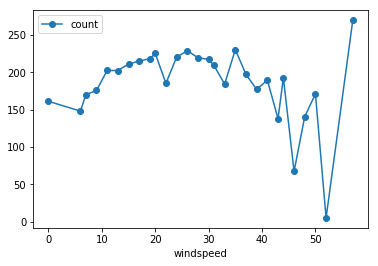

In [34]:
df_train_origin.groupby('windspeed').mean().plot(y='count', marker='o')
plt.show()

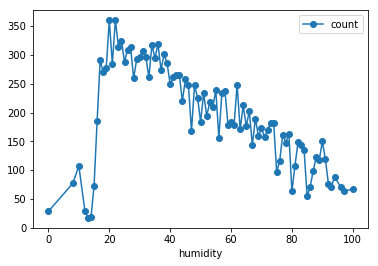

In [35]:
df_train_origin.groupby('humidity').mean().plot(y='count', marker='o')
plt.show()

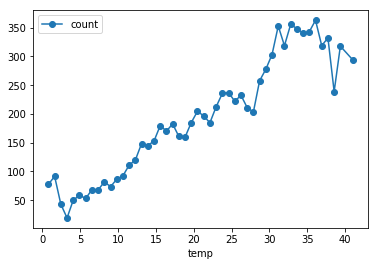

In [36]:
df_train_origin.groupby('temp').mean().plot(y='count', marker='o')
plt.show()

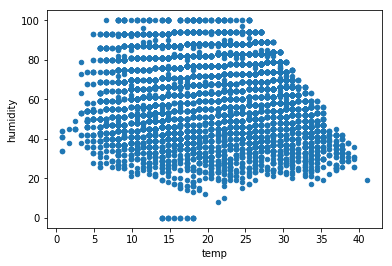

In [37]:
df_train_origin.plot(x='temp', y='humidity', kind='scatter')
plt.show()

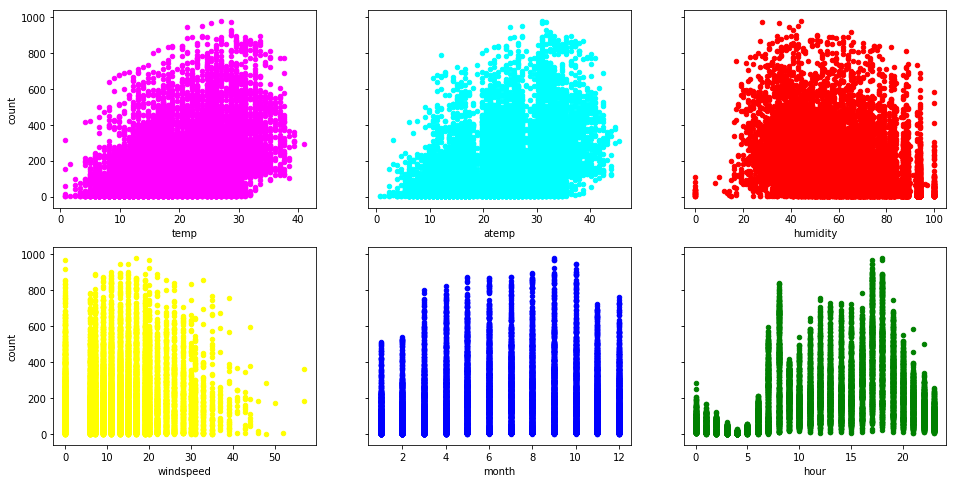

In [38]:
# scatter一下各个维度
fig, axs = plt.subplots(2, 3, sharey=True)
df_train_origin.plot(kind='scatter', x='temp', y='count', ax=axs[0, 0], figsize=(16, 8), color='magenta')
df_train_origin.plot(kind='scatter', x='atemp', y='count', ax=axs[0, 1], color='cyan')
df_train_origin.plot(kind='scatter', x='humidity', y='count', ax=axs[0, 2], color='red')
df_train_origin.plot(kind='scatter', x='windspeed', y='count', ax=axs[1, 0], color='yellow')
df_train_origin.plot(kind='scatter', x='month', y='count', ax=axs[1, 1], color='blue')
df_train_origin.plot(kind='scatter', x='hour', y='count', ax=axs[1, 2], color='green')

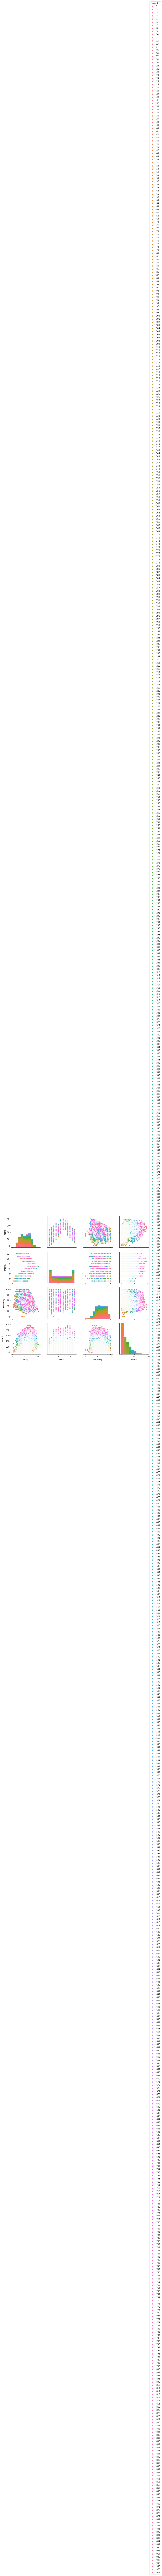

In [39]:
sns.pairplot(df_train_origin[["temp", "month", "humidity", "count"]], hue="count")

In [40]:
corr = df_train_origin[['temp','weather','windspeed','day', 'month', 'hour','count']].corr()
corr

,temp,weather,windspeed,day,month,hour,count
temp,1.000000,-0.055035,-0.017852,-0.038466,0.257589,0.145430,0.394454
weather,-0.055035,1.000000,0.007261,-0.047692,0.012144,-0.022740,-0.128655
windspeed,-0.017852,0.007261,1.000000,-0.024804,-0.150192,0.146631,0.101369
day,-0.038466,-0.047692,-0.024804,1.000000,-0.002266,-0.002925,-0.002283
month,0.257589,0.012144,-0.150192,-0.002266,1.000000,-0.006818,0.166862
hour,0.145430,-0.022740,0.146631,-0.002925,-0.006818,1.000000,0.400601
count,0.394454,-0.128655,0.101369,-0.002283,0.166862,0.400601,1.000000


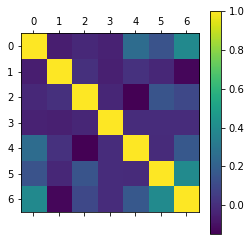

In [41]:
plt.figure()
plt.matshow(corr)
plt.colorbar()
plt.show()